In [1]:
!pip install numpy==1.16.1

     |████████████████████████████████| 17.3MB 2.8MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.8 which is incompatible.
  Found existing installation: numpy 1.16.3
    Uninstalling numpy-1.16.3:
      Successfully uninstalled numpy-1.16.3


In [0]:
import numpy as np
import keras
from keras.layers import Embedding, LSTM, Dense, Activation, Dropout
import matplotlib.pyplot as plt

In [4]:
print(np.__version__)

1.16.1


In [0]:
from keras.datasets import imdb

In [6]:
(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=20000)

17465344/17464789 [==============================] - 0s 0us/step


In [7]:
x_train.shape

(25000,)

In [8]:
print(x_train[5])

[1, 778, 128, 74, 12, 630, 163, 15, 4, 1766, 7982, 1051, 2, 32, 85, 156, 45, 40, 148, 139, 121, 664, 665, 10, 10, 1361, 173, 4, 749, 2, 16, 3804, 8, 4, 226, 65, 12, 43, 127, 24, 15344, 10, 10]


In [9]:
len(x_train[5])

43

In [10]:
np.max(np.array(x_train[5]))

15344

In [11]:
word_index = imdb.get_word_index()
print(len(word_index))

# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()} 
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i) for i in text])

1646592/1641221 [==============================] - 0s 0us/step
88584


In [12]:
x_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 19193,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 10311,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 12118,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,

In [13]:
decode_review(x_train[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be 

In [14]:
reverse_word_index.get(5)

'and'

In [0]:
l=[]
for k,v in word_index.items():
  print(k,v)
  l.append(v)

fawn 34704
tsukino 52009
nunnery 52010
sonja 16819
vani 63954
woods 1411
spiders 16118
hanging 2348
woody 2292
trawling 52011
hold's 52012
comically 11310
localized 40833
disobeying 30571
'royale 52013
harpo's 40834
canet 52014
aileen 19316
acurately 52015
diplomat's 52016
rickman 25245
arranged 6749
rumbustious 52017
familiarness 52018
spider' 52019
hahahah 68807
wood' 52020
transvestism 40836
hangin' 34705
bringing 2341
seamier 40837
wooded 34706
bravora 52021
grueling 16820
wooden 1639
wednesday 16821
'prix 52022
altagracia 34707
circuitry 52023
crotch 11588
busybody 57769
tart'n'tangy 52024
burgade 14132
thrace 52026
tom's 11041
snuggles 52028
francesco 29117
complainers 52030
templarios 52128
272 40838
273 52031
zaniacs 52133
275 34709
consenting 27634
snuggled 40839
inanimate 15495
uality 52033
bronte 11929
errors 4013
dialogs 3233
yomada's 52034
madman's 34710
dialoge 30588
usenet 52036
videodrome 40840
kid' 26341
pawed 52037
'girlfriend' 30572
'pleasure 52038
'reloaded' 52039
k

In [0]:
vocab_size=np.array(l)
np.max(vocab_size)

88587

In [0]:
word_index["<PAD>"]

0

In [0]:
max=0
for i in range(x_train.shape[0]):
  if(max<len(x_train[i])):
    max=len(x_train[i])
  if(max<len(x_test[i])):
    max=len(x_test[i])
print(max)

2494


In [0]:
maxlen=175

In [0]:
x_train= keras.preprocessing.sequence.pad_sequences(x_train,padding='post',value=word_index["<PAD>"],maxlen=maxlen)
x_test= keras.preprocessing.sequence.pad_sequences(x_test,padding='post',value=word_index["<PAD>"],maxlen=maxlen)

In [17]:
print(x_train[0])

[ 4536  1111    17   546    38    13   447     4   192    50    16     6
   147  2025    19    14    22     4  1920  4613   469     4    22    71
    87    12    16    43   530    38    76    15    13  1247     4    22
    17   515    17    12    16   626    18 19193     5    62   386    12
     8   316     8   106     5     4  2223  5244    16   480    66  3785
    33     4   130    12    16    38   619     5    25   124    51    36
   135    48    25  1415    33     6    22    12   215    28    77    52
     5    14   407    16    82 10311     8     4   107   117  5952    15
   256     4     2     7  3766     5   723    36    71    43   530   476
    26   400   317    46     7     4 12118  1029    13   104    88     4
   381    15   297    98    32  2071    56    26   141     6   194  7486
    18     4   226    22    21   134   476    26   480     5   144    30
  5535    18    51    36    28   224    92    25   104     4   226    65
    16    38  1334    88    12    16   283     5   

In [18]:
model=keras.Sequential()

model.add(Embedding(20000,128,input_length=maxlen))
model.add(LSTM(128, dropout=0.15))
model.add(Dense(256,activation="tanh"))
model.add(Dropout(0.2))
model.add(Dense(128,activation="tanh"))
model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid"))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 175, 128)          2560000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total para

In [0]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [21]:
print('Train...')
history=model.fit(x_train, y_train,
          batch_size=256,
          epochs=2,
          validation_data=(x_test, y_test))

Train...
Instructions for updating:
Use tf.cast instead.
Train on 25000 samples, validate on 25000 samples
Epoch 1/2
25000/25000 [==============================] - 40s 2ms/step - loss: 0.5819 - acc: 0.6591 - val_loss: 0.4007 - val_acc: 0.8380
Epoch 2/2
25000/25000 [==============================] - 35s 1ms/step - loss: 0.2707 - acc: 0.8952 - val_loss: 0.3262 - val_acc: 0.8678


In [22]:
history_dict=history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [0]:
acc=history_dict['acc']
val_acc=history_dict['val_acc']
loss=history_dict['loss']
val_loss=history_dict['val_loss']

epochs = range(1, len(acc) + 1)

This Graph is only for 2 Epochs


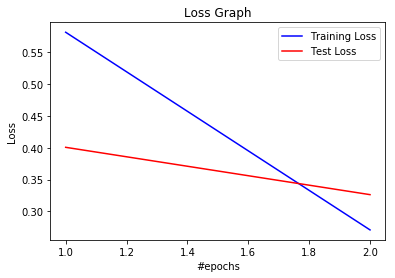

In [29]:
print("This Graph is only for 2 Epochs")
plt.plot(epochs,loss,'b',label="Training Loss")
plt.plot(epochs,val_loss,'r',label="Test Loss")
plt.title("Loss Graph")
plt.xlabel("#epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

This graph is only for 2 Epochs


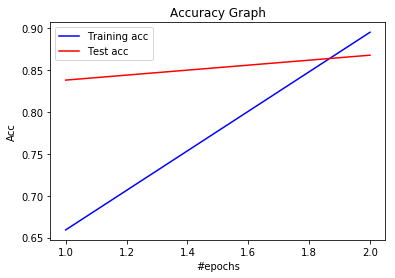

In [30]:
print("This graph is only for 2 Epochs")
plt.plot(epochs,acc,'b',label="Training acc")
plt.plot(epochs,val_acc,'r',label="Test acc")
plt.title("Accuracy Graph")
plt.xlabel("#epochs")
plt.ylabel("Acc")
plt.legend()
plt.show()